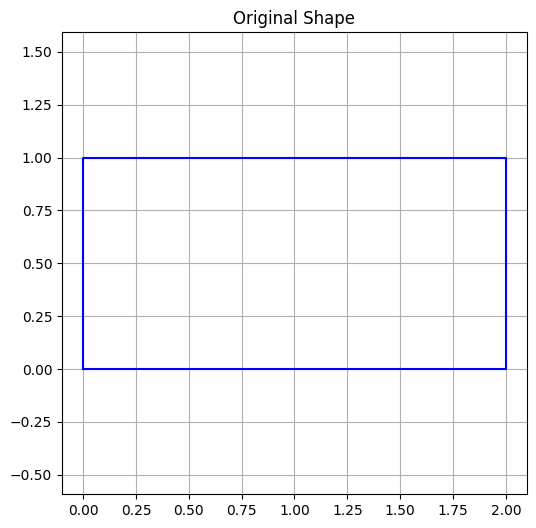

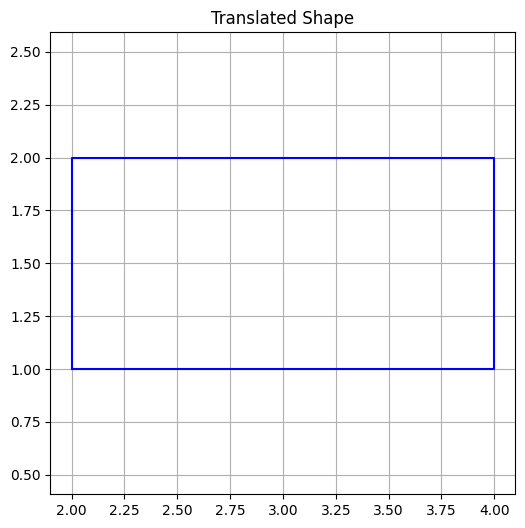

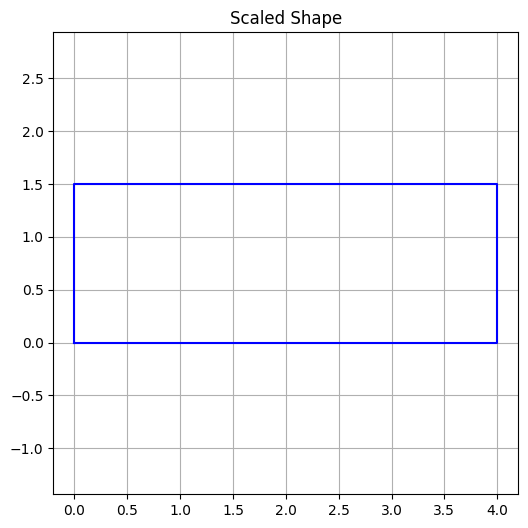

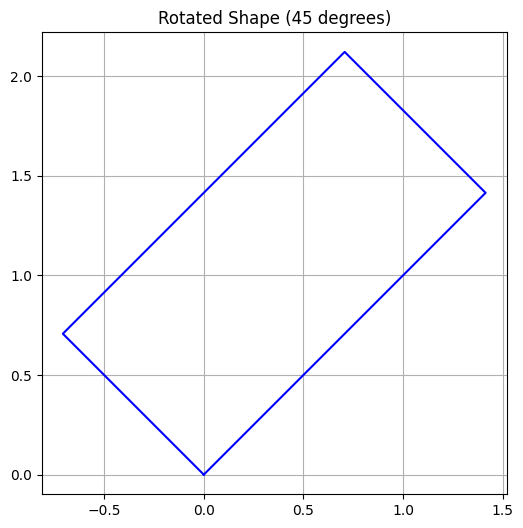

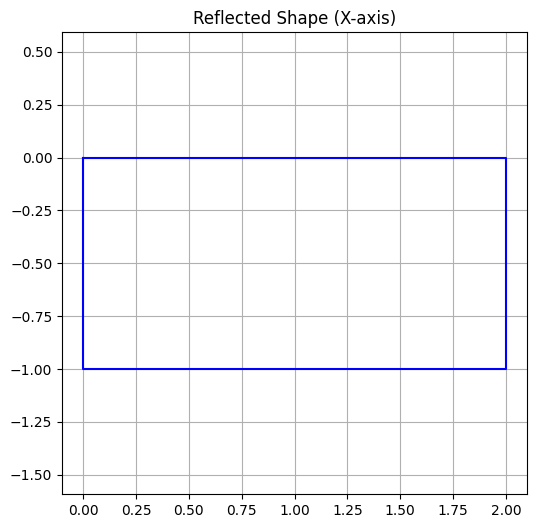

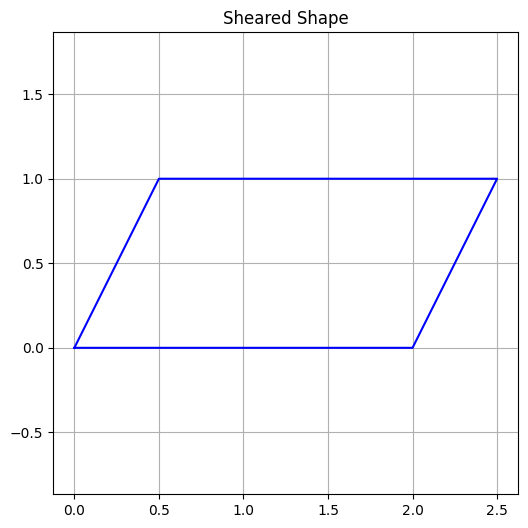

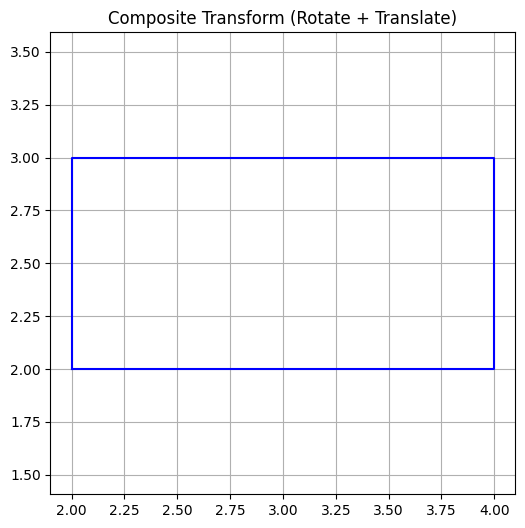

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Transform2D:
    def __init__(self):
        self.points = np.array([
            [0, 0, 1],  # Bottom-left
            [2, 0, 1],  # Bottom-right
            [2, 1, 1],  # Top-right
            [0, 1, 1]   # Top-left
        ]).T  # Transpose for easier matrix multiplication

    def plot_shape(self, points, title="Shape"):
        plt.figure(figsize=(6, 6))
        # Plot the shape by connecting points
        x = points[0]
        y = points[1]
        plt.plot(np.append(x, x[0]), np.append(y, y[0]), 'b-')
        plt.grid(True)
        plt.title(title)
        plt.axis('equal')
        plt.show()

    def translate(self, dx, dy):
        translation_matrix = np.array([
            [1, 0, dx],
            [0, 1, dy],
            [0, 0, 1]
        ])
        return np.dot(translation_matrix, self.points)

    def scale(self, sx, sy):
        scaling_matrix = np.array([
            [sx, 0, 0],
            [0, sy, 0],
            [0, 0, 1]
        ])
        return np.dot(scaling_matrix, self.points)

    def rotate(self, angle_degrees):
        angle = np.radians(angle_degrees)
        rotation_matrix = np.array([
            [np.cos(angle), -np.sin(angle), 0],
            [np.sin(angle), np.cos(angle), 0],
            [0, 0, 1]
        ])
        return np.dot(rotation_matrix, self.points)

    def reflect(self, axis='x'):
        if axis.lower() == 'x':
            reflection_matrix = np.array([
                [1, 0, 0],
                [0, -1, 0],
                [0, 0, 1]
            ])
        else:  # y-axis
            reflection_matrix = np.array([
                [-1, 0, 0],
                [0, 1, 0],
                [0, 0, 1]
            ])
        return np.dot(reflection_matrix, self.points)

    def shear(self, shx=0, shy=0):
        shear_matrix = np.array([
            [1, shx, 0],
            [shy, 1, 0],
            [0, 0, 1]
        ])
        return np.dot(shear_matrix, self.points)

    def composite_transform(self, transformations):
        """
        Apply multiple transformations in sequence
        transformations: list of (function, args) tuples
        """
        result = self.points.copy()
        for transform_func, args in transformations:
            result = transform_func(*args)
        return result

# Example usage
if __name__ == "__main__":  # Fixed condition
    transform = Transform2D()

    # Original shape
    transform.plot_shape(transform.points, "Original Shape")

    # Translation
    translated = transform.translate(2, 1)
    transform.plot_shape(translated, "Translated Shape")

    # Scaling
    scaled = transform.scale(2, 1.5)
    transform.plot_shape(scaled, "Scaled Shape")

    # Rotation
    rotated = transform.rotate(45)
    transform.plot_shape(rotated, "Rotated Shape (45 degrees)")

    # Reflection
    reflected = transform.reflect('x')
    transform.plot_shape(reflected, "Reflected Shape (X-axis)")

    # Shearing
    sheared = transform.shear(0.5, 0)
    transform.plot_shape(sheared, "Sheared Shape")

    # Composite transformation (rotate then translate)
    composite = transform.composite_transform([
        (transform.rotate, (45,)),
        (transform.translate, (2, 2))
    ])
    transform.plot_shape(composite, "Composite Transform (Rotate + Translate)")


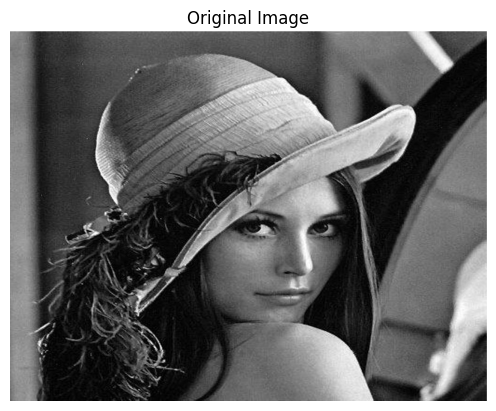

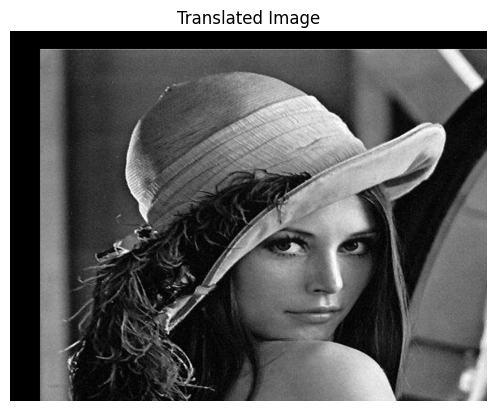

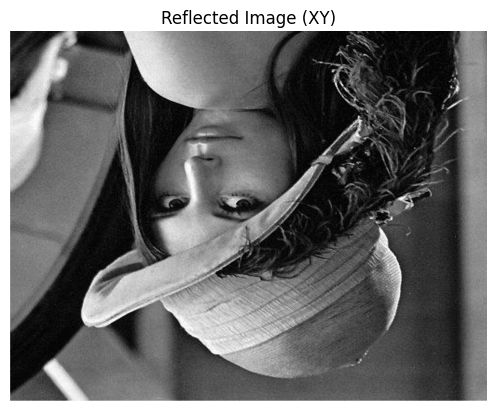

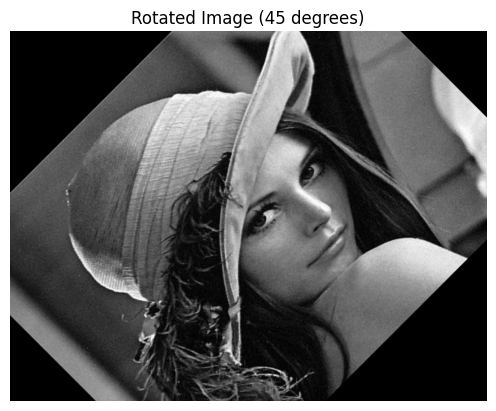

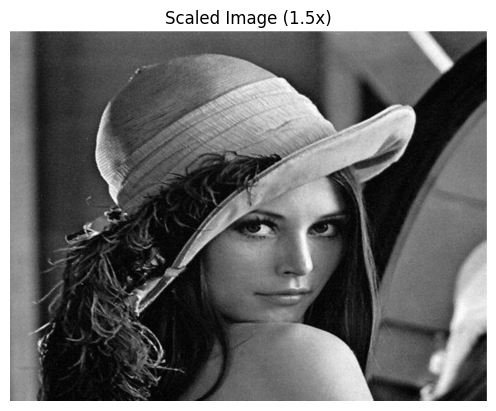

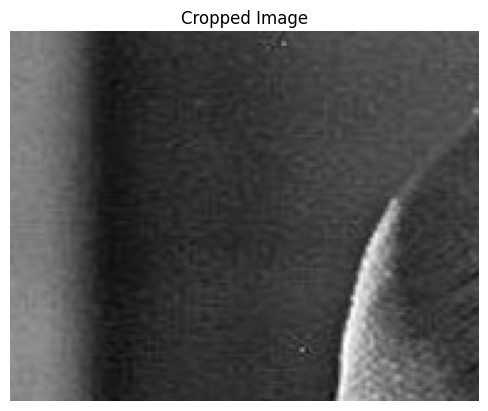

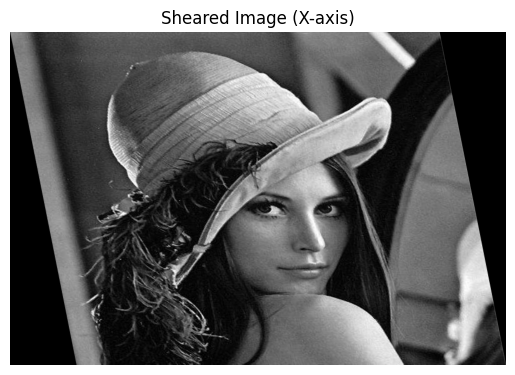

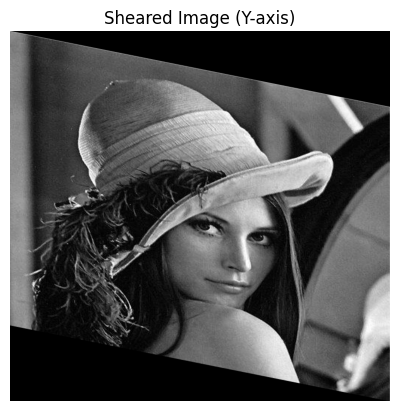

Design By Juhi 


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(title, image):
    """Display an image using Matplotlib."""
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the image
image_path = "/content/SAMPLE.jpg"  # Replace with your image path
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image not found at {image_path}")

# Display the original image
display_image("Original Image", image)

# Image Translation
def translate_image(image, tx, ty):
    rows, cols = image.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))
    return translated_image

translated_image = translate_image(image, 50, 30)
display_image("Translated Image", translated_image)

# Reflection
def reflect_image(image, axis):
    if axis == 'x':
        reflected_image = cv2.flip(image, 0)
    elif axis == 'y':
        reflected_image = cv2.flip(image, 1)
    elif axis == 'xy':
        reflected_image = cv2.flip(image, -1)
    else:
        raise ValueError("Axis must be 'x', 'y', or 'xy'")
    return reflected_image

reflected_image = reflect_image(image, 'xy')
display_image("Reflected Image (XY)", reflected_image)

# Rotation
def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    center = (cols // 2, rows // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

rotated_image = rotate_image(image, 45)
display_image("Rotated Image (45 degrees)", rotated_image)

# Scaling
def scale_image(image, fx, fy):
    scaled_image = cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
    return scaled_image

scaled_image = scale_image(image, 1.5, 1.5)
display_image("Scaled Image (1.5x)", scaled_image)

# Cropping
def crop_image(image, start_x, start_y, end_x, end_y):
    cropped_image = image[start_y:end_y, start_x:end_x]
    return cropped_image

cropped_image = crop_image(image, 10, 50, 200, 200)
display_image("Cropped Image", cropped_image)

# Shearing in X-axis
def shear_image_x(image, shear_factor):
    rows, cols = image.shape[:2]
    shear_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    sheared_image = cv2.warpAffine(image, shear_matrix, (cols + int(shear_factor * rows), rows))
    return sheared_image

sheared_image_x = shear_image_x(image, 0.2)
display_image("Sheared Image (X-axis)", sheared_image_x)

# Shearing in Y-axis
def shear_image_y(image, shear_factor):
    rows, cols = image.shape[:2]
    shear_matrix = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    sheared_image = cv2.warpAffine(image, shear_matrix, (cols, rows + int(shear_factor * cols)))
    return sheared_image

sheared_image_y = shear_image_y(image, 0.2)
display_image("Sheared Image (Y-axis)", sheared_image_y)

print ("Design By Juhi ")
